<a href="https://colab.research.google.com/github/Ronit-Pai/Lung-Cancer-Classification/blob/main/logi_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score,matthews_corrcoef,roc_auc_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

train_data = pd.read_csv("survey lung cancer.csv")
print("Training Data Preview:")
print(train_data.head())

target_column = 'LUNG_CANCER'
if target_column not in train_data.columns:
    raise KeyError(f"Target column '{target_column}' not found in the training data.")

X_train = pd.get_dummies(train_data.drop(target_column, axis=1), drop_first=True)
y_train = train_data[target_column]

print("\nTraining Features after Encoding:")
print(X_train.head())

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
print("\nModel trained successfully on the training data.")

training_columns = X_train.columns

new_data = pd.read_csv("predict_data.csv")
print("\nNew Data Preview:")
print(new_data.head())

X_new = pd.get_dummies(new_data, drop_first=True)
X_new = X_new.reindex(columns=training_columns, fill_value=0)
print("\nNew Data Features after Encoding and Reindexing:")
print(X_new.head())

X_new_scaled = scaler.transform(X_new)

predictions = model.predict(X_new_scaled)
new_data['predicted_lung_cancer'] = predictions

print("\nPredictions on New Data:")
print(new_data)
new_data.to_csv("logistic_result.csv", index=False)

predictions = pd.read_csv("logistic_result.csv")
original = pd.read_csv("survey lung cancer.csv")


merged = pd.merge(
    predictions,
    original,
    on=["GENDER", "AGE", "SMOKING", "YELLOW_FINGERS", "ANXIETY", "PEER_PRESSURE",
        "CHRONIC DISEASE", "FATIGUE ", "ALLERGY ", "WHEEZING", "ALCOHOL CONSUMING",
        "COUGHING", "SHORTNESS OF BREATH", "SWALLOWING DIFFICULTY", "CHEST PAIN"],
    suffixes=('_predicted', '_true')
)


correct = (merged['predicted_lung_cancer'] == merged['LUNG_CANCER']).sum()
total = len(merged)
accuracy = (correct / total) * 100

print(f"Accuracy: {accuracy:.2f}%")
pred_df = pd.read_csv("logistic_result.csv")
pred_df["predicted_lung_cancer"] = pred_df["predicted_lung_cancer"].map({"YES": 1, "NO": 0})
pred_labels = pred_df["predicted_lung_cancer"]
true_labels = train_data["LUNG_CANCER"].map({"YES": 1, "NO": 0})

precision_scr = precision_score(true_labels, pred_labels)
print("Precision score:", precision_scr)

recall_scr = recall_score(true_labels, pred_labels)
print("Recall score:", recall_scr)

f1_scr = f1_score(true_labels,pred_labels)
print("F1 score:", f1_scr)




mcc = matthews_corrcoef(true_labels, pred_labels)
print("MCC score:", mcc)



auroc_scr = roc_auc_score(true_labels, pred_labels)
print("AUROC score:", auroc_scr)


Training Data Preview:
  GENDER  AGE  SMOKING  ...  SWALLOWING DIFFICULTY  CHEST PAIN  LUNG_CANCER
0      M   69        1  ...                      2           2          YES
1      M   74        2  ...                      2           2          YES
2      F   59        1  ...                      1           2           NO
3      M   63        2  ...                      2           2           NO
4      F   63        1  ...                      1           1           NO

[5 rows x 16 columns]

Training Features after Encoding:
   AGE  SMOKING  YELLOW_FINGERS  ...  SWALLOWING DIFFICULTY  CHEST PAIN  GENDER_M
0   69        1               2  ...                      2           2      True
1   74        2               1  ...                      2           2      True
2   59        1               1  ...                      1           2     False
3   63        2               2  ...                      2           2      True
4   63        1               2  ...                 

Confusion Matrix:
[[ 28  11]
 [  6 264]]


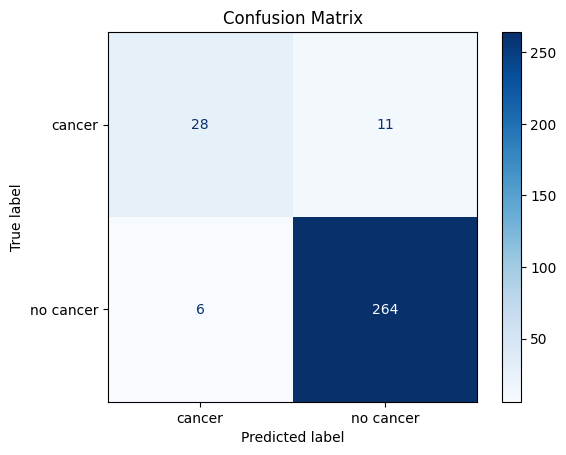

In [ ]:
cm = confusion_matrix(true_labels, pred_labels)
print("Confusion Matrix:")
print(cm)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["cancer","no cancer"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()